In [1]:
# !pip install pandas
# !pip install sklearn
# !pip install matplotlib
# !pip install numpy


# Ejemplo de un modelo de clasificación

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar base de datos

In [3]:
#Obtenido en base a la documentacion del conjunto de datos
header = ['Mean_IP','Standard_deviation_IP','Excess_kurtosis_IP','Skewness_IP',
          'Mean_DM-SNR_curve','Standard_DM-SNR_curve','Excess_kurtosis_DM-SNR_curve','Skewness_DM-SNR_curve',
         'pulsar']

dataset = pd.read_csv("HTRU_2.csv",header= None, names = header, sep = ",")
print("Número de muestras = ", dataset.shape[0])
print("Número de columnas = ", dataset.shape[1])
display(dataset)

Número de muestras =  17898
Número de columnas =  9


,Mean_IP,Standard_deviation_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DM-SNR_curve,Standard_DM-SNR_curve,Excess_kurtosis_DM-SNR_curve,Skewness_DM-SNR_curve,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## Separar datos de etiquetas

In [4]:
# Separamos los datos en X = caracteristicas o variables y Y = clases (salida del modelo)
X = dataset[['Mean_IP','Standard_deviation_IP','Excess_kurtosis_IP','Skewness_IP',
          'Mean_DM-SNR_curve','Standard_DM-SNR_curve','Excess_kurtosis_DM-SNR_curve','Skewness_DM-SNR_curve']] # Cada columna es una característica o columna

y = dataset['pulsar'] # Datos etiquetados como clases 0 y 1

display(X)
print("\n")
display(y)

,Mean_IP,Standard_deviation_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DM-SNR_curve,Standard_DM-SNR_curve,Excess_kurtosis_DM-SNR_curve,Skewness_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: pulsar, Length: 17898, dtype: int64

## Escalado de los datos

In [5]:
# Debido a que cada columna de X tiene diferente escalas de los datos, nos puede generar inconvenientes a la hora de crear
# un modelo de clasificación. Por consiguiente, se decide utilizar un escalamiento estándar en los datos para que queden
# escalas proporcionadas.
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

ss = StandardScaler()
X_scaled = ss.fit_transform(X) # Se realiza la transformación del conjunto de datos. 
print(X_scaled)  # Resultado del escalamiento estándar

[[ 1.14931702  1.33483164 -0.66956953 ... -0.37062547 -0.07279778
  -0.28743812]
 [-0.3341682   1.80226533 -0.01178476 ... -0.5889241   0.50442694
   0.21158145]
 [-0.31437216 -1.05332222 -0.14523256 ... -0.23532816 -0.12599609
  -0.39137346]
 ...
 [ 0.3218423   1.95621968 -0.2993338  ...  1.67156847 -1.28807874
  -0.94133005]
 [ 0.13362759  1.07450972 -0.26005007 ... -0.66485697  0.37825656
   0.27584987]
 [-2.10576204  5.73546965  0.87267394 ...  1.97154554 -2.19732744
  -0.97105168]]


## Division de los datos(train-test)

In [6]:
# A partir de Y y X_escalado, procedemos a separar los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

print('Tamaño de los datos de entrenamiento: ', X_train.shape)
print('Tamaño de los datos de prueba: ', X_test.shape)
print('Tamaño del vector de clases de entrenamiento: ', y_train.shape)
print('Tamaño del vector de clases de prueba: ', y_test.shape)

Tamaño de los datos de entrenamiento:  (12528, 8)
Tamaño de los datos de prueba:  (5370, 8)
Tamaño del vector de clases de entrenamiento:  (12528,)
Tamaño del vector de clases de prueba:  (5370,)


## Creación de modelos de clasificación

In [7]:
from sklearn.naive_bayes import GaussianNB # Algoritmo Naive Bayes Gaussiano
clf_GNB = GaussianNB(var_smoothing = 1e-9) # Configurar parámetros del algoritmo
clf_GNB = clf_GNB.fit(X_train,y_train.ravel()) # Se crea el modelo de clasificación

In [8]:
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
clf_RFC = RandomForestClassifier(n_estimators=100)
clf_RFC = clf_RFC.fit(X_train,y_train) #Train the model using the training sets y_pred=clf.predict(X_test)

In [9]:
from sklearn import svm
clf_SVM = svm.SVC(kernel='linear')
clf_SVM = clf_SVM.fit(X_train, y_train)

## Validación de los modelos

In [10]:
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_RFC=clf_RFC.predict(X_test)
y_pred_SVM=clf_SVM.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
#All scorer objects follow the convention that higher return values are better than lower return values.
from sklearn import metrics 
# Model Accuracy, how often is the classifier correct?
print("Accuracy for GNB:",metrics.accuracy_score(y_test, y_pred_GNB))
print("Accuracy for RFC:",metrics.accuracy_score(y_test, y_pred_RFC))
print("Accuracy for SVM:",metrics.accuracy_score(y_test, y_pred_SVM))
#The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.


# The classification_report function builds a text report showing the main classification metrics.
print("Classification Report for GNB:\n",metrics.classification_report(y_test, y_pred_GNB))
print("Classification Report for RFC:\n",metrics.classification_report(y_test, y_pred_RFC))
print("Classification Report for SVM:\n",metrics.classification_report(y_test, y_pred_SVM))

Accuracy for GNB: 0.948975791433892
Accuracy for RFC: 0.9813780260707635
Accuracy for SVM: 0.9808193668528864
Classification Report for GNB:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370

Classification Report for RFC:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.93      0.84      0.88       444

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.93      0.

## Matriz de confsuion
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png)

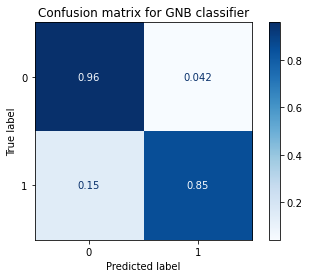

In [11]:
matrix_GNB = metrics.plot_confusion_matrix(clf_GNB, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for GNB classifier')
plt.show(matrix_GNB)

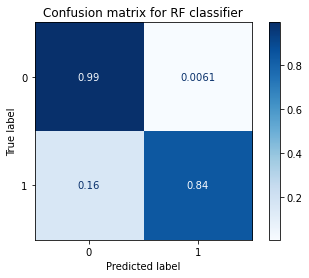

In [12]:
matrix_RFC = metrics.plot_confusion_matrix(clf_RFC, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for RF classifier')
plt.show(matrix_RFC)

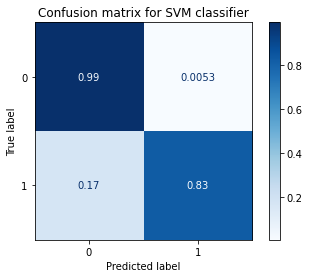

In [13]:
matrix_SVM = metrics.plot_confusion_matrix(clf_SVM, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for SVM classifier')
plt.show(matrix_SVM)

# Analisis

Se utilizaron 3 algoritmos para generar clasificadores: Naive Bayes, Random forest y Support vector machine a los cuales nos referiremos como GNB, RFC, SVM respectivamente.

Inicialmente los datos se separaron en una proporcion 70-30 para entrenamiento y prueba respectivamente.

Para comprobar la correctitud de los modelos generados se presentaron diferentes metricas usando las funciones proporcionadas por el modulo metrics de sklearn, las cuales fueron plot_confusion_matrix() para realizar la matriz de confusion, accuracy_score() para calcular la exactitud y classification_report() que presenta diereentes metricas tales como precision, puntaje f1, entre otras.

Para analizar los resultados nos guiaremos principalmente por el puntaje de exactitud y la matriz de confusion(la cual nos habla tambien de exactitud pero en cada una de las combinaciones posibles predecido X verdadero) que es presentada en su "version" normalizada.

Los valores de exactiud obtenidos para cada clasificador son aproximadamente 0.95, 0.98 y 0.98 para los clasificadores GNB, RFC y SVM respectivamente. Se puede notar que el rendimiento de RFC y SVM es mejor que el de GNB, pero aun asi todo producen buenos resultados.

Al analizar y comparar la matriz de confusion de cada clasificador podemos notar RFC y SVM proporcionan una alta exactitud(0.99) al clasificar correctamente las etiquetas negativas(falso Pulsar) pero su desempeño disminuye al clasificar positivamente(pulsares verdaderos) en comparacion con lo obtenido en el caso de GNB (0.83 vs 0.85).

En todos los casos se presenta una tendencia a clasificar como falsos algunos Pulsares aun siendo verdaderos (0.15, 0.15, 0.17), esto principalmente se debe a que nos encontramos ante un problema desbalanceado en el que hay una gran diferencia entre el numero de muestras que correspondo a cada etiqueta/clase( 1,639 ejemplos positivos contra 16,259 ejemplos negativos). Para solucionar esto se propone utilizar una metodologia de muestreo estratificado al momento de separar los datos y entrenar el modelo. (sklearn.model_selection.StratifiedShuffleSplit; sklearn.model_selection.StratifiedKFold)


A continuacion se presentan las matrices de confusion para mayor claridad
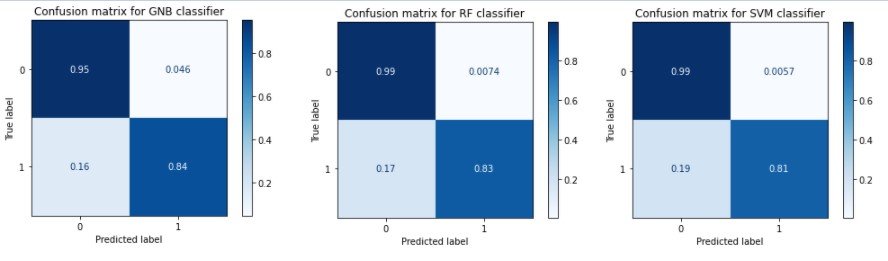